# Comparison of CMIP6 s2p3 runs over GBR

In [91]:
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import iris.coord_categorisation


In [92]:
def extract_region(cube,lon_west,lon_east,lat_south,lat_north):
    cube_region_tmp = cube.intersection(longitude=(lon_west, lon_east))
    cube_region = cube_region_tmp.intersection(latitude=(lat_south, lat_north))
    return cube_region


def area_avg(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas)

In [93]:
file = '/Users/ph290/Downloads/canesm5_gbr/ssp585/canesm_GBR_surfacetemperature_histssp585_ym.nc'
file_bottom = '/Users/ph290/Downloads/canesm5_gbr/ssp585/canesm_GBR_bottomtemperature_histssp585_ym.nc'

# file = '/Users/ph290/Downloads/global_tropics/surface_temperature_global_tropics_era5_year_mean_mv.nc'
# file = '/Users/ph290/Downloads/global_tropics/surface_temperature_global_tropics_era5.nc'
year_for_basic_comparison = 1990

In [94]:
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_19890101.nc','sea_surface_temperature')[0]
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_1989.nc','sea_surface_temperature')
obs_cube_all = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_year_mean.nc','sea_surface_temperature')
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_2008_all_tm.nc','sea_surface_temperature')

In [95]:
obs_cube_all = obs_cube_all
try:
    iris.coord_categorisation.add_year(obs_cube_all, 'time', name='year')
except:
    pass

print obs_cube_all.coord('year').points

obs_cube = obs_cube_all[np.where(obs_cube_all.coord('year').points == year_for_basic_comparison)]
obs_cube = obs_cube.collapsed('time',iris.analysis.MEAN)
# obs_cube = obs_cube_all[np.where(obs_cube_all.coord('year').points == year_for_basic_comparison)]



[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019]


In [96]:
# cube = iris.load_cube(file)[0]

cube_all = iris.load_cube(file)
try:
    iris.coord_categorisation.add_year(cube_all, 'time', name='year')
except:
    pass

cube_all = cube_all.aggregated_by('year', iris.analysis.MEAN)


# cube_all.coord('longitude').points = cube_all.coord('longitude').points+180
# cube_all.data = np.ma.masked_array(cube_all.data)
# cube_all.data.fill_value = 9.96920997e+36
cube_all.data = np.ma.masked_where(cube_all.data == 9.96920997e+36, cube_all.data)
# iris.coord_categorisation.add_year(cube_all, 'time', name='year')
cube = cube_all[np.where(cube_all.coord('year').points == year_for_basic_comparison)]
cube = cube.collapsed('time',iris.analysis.MEAN)

In [97]:
cube_all_bottom = iris.load_cube(file_bottom)
try:
    iris.coord_categorisation.add_year(cube_all_bottom, 'time', name='year')
except:
    pass

cube_all_bottom = cube_all_bottom.aggregated_by('year', iris.analysis.MEAN)
cube_all_bottom.data = np.ma.masked_where(cube_all_bottom.data == 9.96920997e+36, cube_all_bottom.data)
# cube_bottom = cube_all_bottom[np.where(cube_all_bottom.coord('year').points == year_for_basic_comparison)]
# cube_bottom = cube_bottom.collapsed('time',iris.analysis.MEAN)

In [98]:
# cube = iris.load_cube(file)
# cube.coord('longitude').points = cube.coord('longitude').points+180
# cube = cube.collapsed('time',iris.analysis.MEAN)

In [99]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

## Directly comparing model and satilite on common grids (regridding model to satilite grid)

basically we've got to the point where the areas where it is hot/cold relate to warm/cold currents. In warm conditions where density is ~linaerly dependent on temperature this is probably not an issue, and we can be confident in the variability, but at high latitudes, one would probably want to corrent the temperatures to ensure the density was responding appropriately to variability. In future runs, if theer was evidence that that there was a chnge in teh large-scale currents feeding an area, that could also be factored in, based on the assumption that the difference between the ECMWF run and observed SST.

## Model minus CRW satilite SST with depth plotted as contours

Comparison of annual mean for year specified at the top of the page

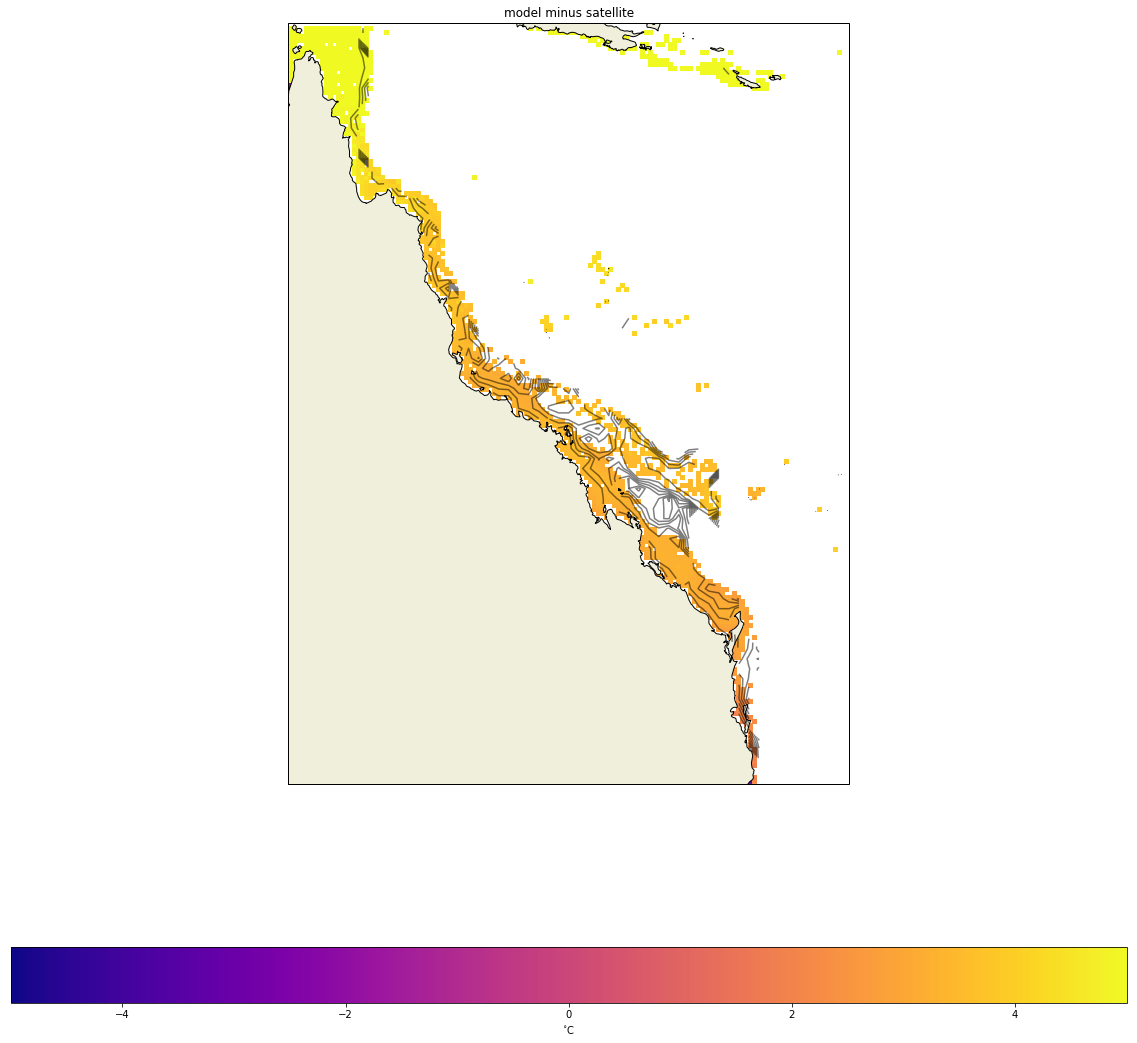

In [125]:
bathy_file = '/Users/ph290/Downloads/ETOPO1_Bed_g_gmt4_low_res.nc'
bathy_cube = iris.load_cube(bathy_file)
bathy_cube.data = np.ma.masked_where(bathy_cube.data >= 0.0,bathy_cube.data)
bathy_cube.data = np.ma.masked_where(bathy_cube.data < -100.0,bathy_cube.data)



lon_west = 142
lon_east = 156
lat_south = -29
lat_north = -10

bathy_cube = extract_region(bathy_cube,lon_west,lon_east,lat_south,lat_north)

bathy_data = bathy_cube.data
lat_bathy = bathy_cube.coord('latitude').points
lon_bathy = bathy_cube.coord('longitude').points

lon_west2 = 142
lon_east2 = 156
lat_south2 = -29
lat_north2 = -10

plt.close('all')
fig = plt.figure(figsize=(20, 20))
ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.set_extent((lon_west2, lon_east2, lat_south2, lat_north2), crs=ccrs.PlateCarree())

# ax3 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax3.contour(lon_bathy, lat_bathy,bathy_data*-1.0,10,colors = 'k',alpha=0.5)

p3 = ax3.pcolormesh(lon_crw, lat_model,model_data - crw_data,
                transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
                cmap='plasma')
cbar = plt.colorbar(p3,orientation='horizontal')
cbar.set_label('$^{\circ}$C')


ax3.add_feature(land_10m, edgecolor='k')

ax3.title.set_text('model minus satellite')



plt.show()

## GBR timeseries comparison model v. CRW

In [103]:
def compariable_across_grids(cube1,cube2,lon_west,lon_east,lat_south,lat_north):
    cube1_region = extract_region(cube1,lon_west,lon_east,lat_south,lat_north)
    cube2_region = extract_region(cube2,lon_west,lon_east,lat_south,lat_north)
    
    cube2_region.coord('latitude').coord_system = cube1_region.coord('latitude').coord_system
    cube2_region.coord('longitude').coord_system =cube1_region.coord('longitude').coord_system

    cube1_region_regridded = cube1_region.regrid(cube2_region, iris.analysis.Linear())
    cube2_region.data.mask = cube1_region_regridded.data.mask


    cube2_region.data[np.where(cube2_region.data < -20.0)] = cube2_region.data.fill_value
    cube2_region.data[np.where(cube2_region.data >100.0)] = cube2_region.data.fill_value
    cube2_region.data = np.ma.masked_where(cube2_region.data == cube2_region.data.fill_value, cube2_region.data)

    cube1_region_regridded.data[np.where(cube1_region_regridded.data < -20.0)] = cube1_region_regridded.data.fill_value
    cube1_region_regridded.data[np.where(cube1_region_regridded.data > 100.0)] = cube1_region_regridded.data.fill_value
    cube1_region_regridded.data = np.ma.masked_where(cube1_region_regridded.data == cube1_region_regridded.data.fill_value, cube1_region_regridded.data)
    return cube1_region_regridded,cube2_region

In [104]:
model_region_regridded,obs_region = compariable_across_grids(cube_all,obs_cube_all,142,156,-29,-10)
model_bottom_region_regridded,obs_region = compariable_across_grids(cube_all_bottom,obs_cube_all,142,156,-29,-10)


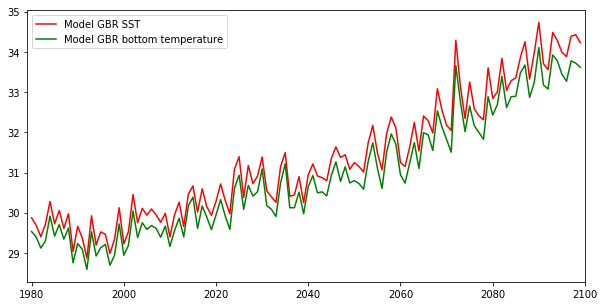

In [129]:
import scipy
import matplotlib.pyplot as plt
from scipy import signal


def select_range(cube, my_range):
    return cube[np.where((cube.coord('year').points > my_range[0]) & (cube.coord('year').points < my_range[1]))]

cube_all_region_area_avg = area_avg(model_region_regridded)
obs_cube_all_region_area_avg = area_avg(obs_region)

cube_all_region_area_avg_bottom = area_avg(model_bottom_region_regridded)


plotting_range = [1979,2100]
cube_all_region_area_avg = select_range(cube_all_region_area_avg, plotting_range)
obs_cube_all_region_area_avg = select_range(obs_cube_all_region_area_avg, plotting_range)

cube_all_region_area_avg_bottom = select_range(cube_all_region_area_avg_bottom, plotting_range)


# fig, ax1 = plt.subplots()

# ax1.plot(cube_all_region_area_avg.coord('year').points,cube_all_region_area_avg.data,'r',label='Model GBR SST')

# # ax2 = ax1.twinx() 

# ax.plot(obs_cube_all_region_area_avg.coord('year').points,obs_cube_all_region_area_avg.data,'k',label='CRW GBR satilite SST')

# ax1.set_xlim([2003,2017])
# plt.legend()
# plt.show()


fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(cube_all_region_area_avg.coord('year').points,cube_all_region_area_avg.data,'r',label='Model GBR SST')
# ax1.plot(obs_cube_all_region_area_avg.coord('year').points,obs_cube_all_region_area_avg.data,'k',label='CRW GBR satilite SST')
ax1.plot(cube_all_region_area_avg_bottom.coord('year').points,cube_all_region_area_avg_bottom.data,'g',label='Model GBR bottom temperature')

ax1.set_xlim([1979,2100])
plt.legend()
plt.show()






*thoughts:* is the model drifting to the right temperature after a long spinup stage? Start the run earlier and/or change the initialisation temperature and re-run.

## correcting model to satilite climatological values

In [106]:
def select_year_range(cube, my_range):
    try:
        iris.coord_categorisation.add_year(cube, 'time', name='year')
    except:
        pass
    return cube[np.where((cube.coord('year').points > my_range[0]) & (cube.coord('year').points < my_range[1]))]


#note, they shoudl already be on the same grid and the same region
def anomaly_fields_from_satellite(model_cube,satilite_cube,common_yr_start,common_yr_end):
    model_cube_climatology = select_year_range(model_cube, [common_yr_start,common_yr_end]).collapsed('time',iris.analysis.MEAN)
    satilite_cube_climatology = select_year_range(satilite_cube, [common_yr_start,common_yr_end]).collapsed('time',iris.analysis.MEAN)
    diff = model_cube_climatology.copy()
    diff.data = model_cube_climatology.data - satilite_cube_climatology.data
    return model_cube - diff
    
    

    
corrected_model_field = anomaly_fields_from_satellite(model_region_regridded,obs_region,1995,2015)

    

## plotting corrected model output

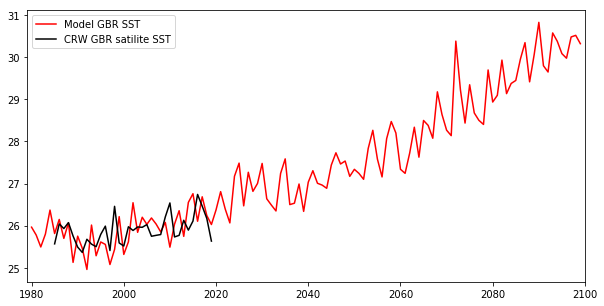

In [128]:

cube_all_region_area_avg = area_avg(corrected_model_field)
obs_cube_all_region_area_avg = area_avg(obs_region)



plotting_range = [1979,2100]
cube_all_region_area_avg = select_range(cube_all_region_area_avg, plotting_range)
obs_cube_all_region_area_avg = select_range(obs_cube_all_region_area_avg, plotting_range)


fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(cube_all_region_area_avg.coord('year').points,cube_all_region_area_avg.data,'r',label='Model GBR SST')
ax1.plot(obs_cube_all_region_area_avg.coord('year').points,obs_cube_all_region_area_avg.data,'k',label='CRW GBR satilite SST')

ax1.set_xlim([1979,2100])
plt.legend()
plt.show()

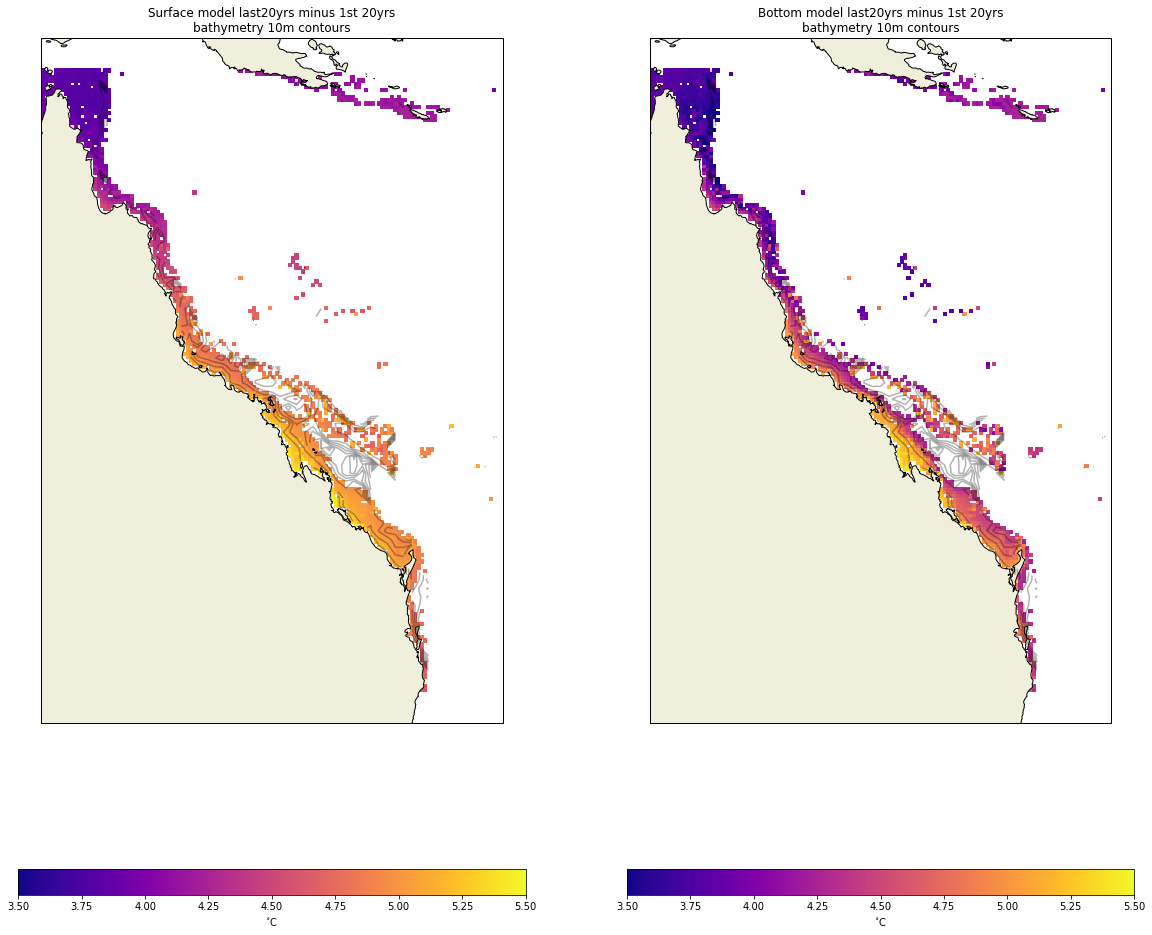

In [121]:
bathy_file = '/Users/ph290/Downloads/ETOPO1_Bed_g_gmt4_low_res.nc'
bathy_cube = iris.load_cube(bathy_file)
bathy_cube.data = np.ma.masked_where(bathy_cube.data >= 0.0,bathy_cube.data)
bathy_cube.data = np.ma.masked_where(bathy_cube.data < -100.0,bathy_cube.data)



lon_west = 142
lon_east = 156
lat_south = -29
lat_north = -10

bathy_cube = extract_region(bathy_cube,lon_west,lon_east,lat_south,lat_north)

bathy_data = bathy_cube.data
lat_bathy = bathy_cube.coord('latitude').points
lon_bathy = bathy_cube.coord('longitude').points



lat_model = cube_all.coord('latitude').points
lon_model = cube_all.coord('longitude').points


plt.close('all')
fig = plt.figure(figsize=(20, 18))

ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.contour(lon_bathy, lat_bathy,bathy_data*-1.0,10,colors = 'k',alpha=0.3)
p1 = ax1.pcolormesh(lon_model, lat_model,cube_all[-20::].collapsed('time',iris.analysis.MEAN).data - cube_all[0:20].collapsed('time',iris.analysis.MEAN).data,
                transform=ccrs.PlateCarree(),
                cmap='plasma',vmin=3.5,vmax=5.5)
cbar = plt.colorbar(p1,orientation='horizontal')
cbar.set_label('$^{\circ}$C')
ax1.add_feature(land_10m, edgecolor='k')
ax1.title.set_text('Surface model last20yrs minus 1st 20yrs\nbathymetry 10m contours')


ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.contour(lon_bathy, lat_bathy,bathy_data*-1.0,10,colors = 'k',alpha=0.3)
p2 = ax2.pcolormesh(lon_model, lat_model,cube_all_bottom[-20::].collapsed('time',iris.analysis.MEAN).data - cube_all_bottom[0:20].collapsed('time',iris.analysis.MEAN).data,
                transform=ccrs.PlateCarree(),
                cmap='plasma',vmin=3.5,vmax=5.5)
cbar = plt.colorbar(p2,orientation='horizontal')
cbar.set_label('$^{\circ}$C')
ax2.add_feature(land_10m, edgecolor='k')
ax2.title.set_text('Bottom model last20yrs minus 1st 20yrs\nbathymetry 10m contours')



plt.show()

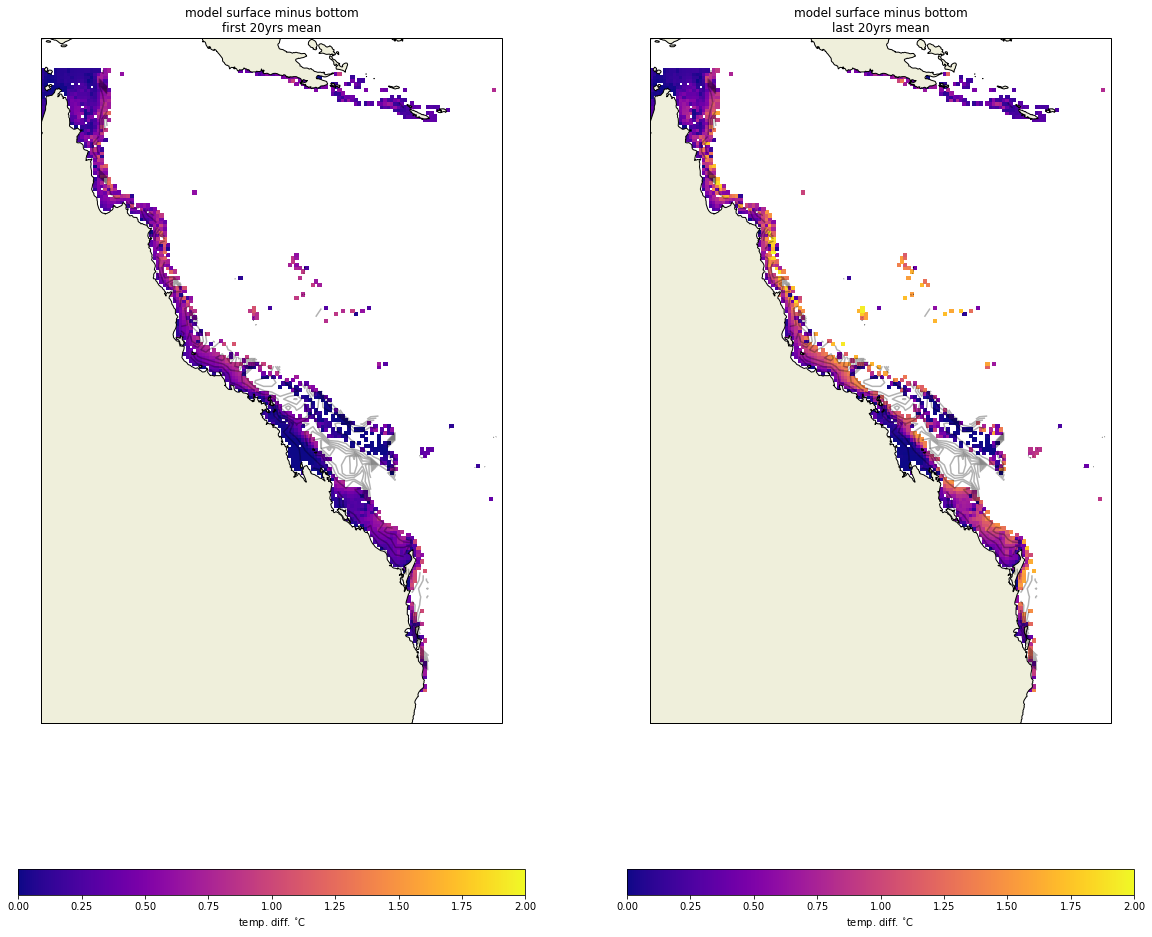

In [122]:
surface_first20 = cube_all[0:20].collapsed('time',iris.analysis.MEAN)
bottom_first20 = cube_all_bottom[0:20].collapsed('time',iris.analysis.MEAN)

surface_last20 = cube_all[-20::].collapsed('time',iris.analysis.MEAN)
bottom_last20 = cube_all_bottom[-20::].collapsed('time',iris.analysis.MEAN)

lat_model = surface_first20.coord('latitude').points
lon_model = surface_first20.coord('longitude').points
plt.close('all')
fig = plt.figure(figsize=(20, 18))

ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.contour(lon_bathy, lat_bathy,bathy_data*-1.0,10,colors = 'k',alpha=0.3)
p1 = ax1.pcolormesh(lon_model, lat_model,(surface_first20 - bottom_first20).data,
                transform=ccrs.PlateCarree(),
                cmap='plasma',vmin=0,vmax=2)
cbar = plt.colorbar(p1,orientation='horizontal')
cbar.set_label('temp. diff. $^{\circ}$C')

ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.contour(lon_bathy, lat_bathy,bathy_data*-1.0,10,colors = 'k',alpha=0.3)
p2 = ax2.pcolormesh(lon_model, lat_model,(surface_last20 - bottom_last20).data,
                transform=ccrs.PlateCarree(),
                cmap='plasma',vmin=0,vmax=2)
cbar = plt.colorbar(p2,orientation='horizontal')
cbar.set_label('temp. diff. $^{\circ}$C')


ax1.add_feature(land_10m, edgecolor='k')
ax2.add_feature(land_10m, edgecolor='k')

ax1.title.set_text('model surface minus bottom\nfirst 20yrs mean')
ax2.title.set_text('model surface minus bottom\nlast 20yrs mean')




plt.show()